计算期权的隐含波动率并作图是衍生品风险管理领域的常规工作。

隐含波动率的计算基于Black-Scholes_Merton模型，以欧式看涨期权为例，其基本公式为
$$C(S_t,K,t,T,r,\sigma)=S_tN(d1)-e^{-r(T-t)}KN(d2)$$
$$N(d)=\frac{1}{\sqrt{2\pi}}\int_{-\inf}^d{e^{-0.5x^2}}dx$$
$$d_1=\frac{log\frac{S_t}{K}+(r+0.5\sigma^2)(T-t)}{\sigma\sqrt{T-t}}$$
$$d_2=\frac{log\frac{S_t}{K}+(r-0.5\sigma^2)(T-t)}{\sigma\sqrt{T-t}}$$

隐含波动率的计算方法：
$$C(S_t,K,t,T,r,\sigma_{implied})=C^*$$
$C^*$是已知的期权价格,

基于牛顿法迭代计算$\sigma^{implied}$：$$\sigma_{n+1}^{implied}=\sigma_{n}^{implied}-\frac{C(\sigma_{n}^{implied})-C^*}{C'(\sigma_{n}^{implied})}$$
其中，$C'(\sigma_{n}^{implied})$即期权的Vega，其计算公式为：$$C'(\sigma_{n}^{implied})=S_tN'(d1)\sqrt{T-t}$$

下面是一个计算隐含波动率的例子,假设$t=0$：

首先定义若干计算函数：

In [2]:
def bsm_call_value(S0,K,T,r,sigma):
    from math import log,sqrt,exp
    from scipy import stats
    S0=float(S0)
    d1=(log(S0/K)+(r+0.5*sigma**2)*T)/(sigma*sqrt(T))
    d2=(log(S0/K)+(r-0.5*sigma**2)*T)/(sigma*sqrt(T))
    value=(S0*stats.norm.cdf(d1,0.0,1.0))-K*exp(-r*T)*stats.norm.cdf(d2,0.0,1.0)
    return value

In [3]:
def bsm_vega(S0,K,T,r,sigma):
    from math import log,sqrt
    from scipy import stats
    S0=float(S0)
    d1=(log(S0/K)+(r+0.5*sigma**2)*T)/(sigma*sqrt(T))
    vega=S0*stats.norm.pdf(d1,0.0,1.0)*sqrt(T)
    return vega

In [4]:
def bsm_call_imp_vol(S0,K,T,r,C0,sigma_est,it=100):
#参数sigma_est输入对sigma的预计，作为迭代的初始值
    for i in range(it):
        sigma_est-=((bsm_call_value(S0,K,T,r,sigma_est)-C0)
                 /bsm_vega(S0,K,T,r,sigma_est))
    return sigma_est

我们选择的是关于VSTOXX指数的欧式看涨期权作为举例的数据,参考日期选取2014年3月31日，这一天指数收盘价为$S_0=17.6639$,假设无风险利率$r=0.01$

In [5]:
S0=17.6639

In [6]:
r=0.01

示例数据以pandas Dataframe保存在Pytables数据库文件中,读入内存

In [7]:
import pandas as pd

In [8]:
cd C:\Users\13673\Desktop\finance\data

C:\Users\13673\Desktop\finance\data


In [9]:
h5=pd.HDFStore('vstoxx_data_31032014.h5')
futures_data=h5['futures_data']
options_data=h5['options_data']
h5.close()

In [15]:
futures_data

,DATE,EXP_YEAR,EXP_MONTH,PRICE,MATURITY,TTM
496,1396224000000000000,2014,4,17.85,1397779200000000000,0.049
497,1396224000000000000,2014,5,19.55,1400198400000000000,0.126
498,1396224000000000000,2014,6,19.95,1403222400000000000,0.222
499,1396224000000000000,2014,7,20.40,1405641600000000000,0.299
500,1396224000000000000,2014,8,20.70,1408060800000000000,0.375
501,1396224000000000000,2014,9,20.95,1411084800000000000,0.471
502,1396224000000000000,2014,10,21.05,1413504000000000000,0.548
503,1396224000000000000,2014,11,21.25,1416528000000000000,0.644


In [10]:
options_data

,DATE,EXP_YEAR,EXP_MONTH,TYPE,STRIKE,PRICE,MATURITY,TTM
46170,1396224000000000000,2014,4,C,1.0,16.85,1397779200000000000,0.049
46171,1396224000000000000,2014,4,C,2.0,15.85,1397779200000000000,0.049
46172,1396224000000000000,2014,4,C,3.0,14.85,1397779200000000000,0.049
46173,1396224000000000000,2014,4,C,4.0,13.85,1397779200000000000,0.049
46174,1396224000000000000,2014,4,C,5.0,12.85,1397779200000000000,0.049
46175,1396224000000000000,2014,4,C,6.0,11.85,1397779200000000000,0.049
46176,1396224000000000000,2014,4,C,7.0,10.85,1397779200000000000,0.049
46177,1396224000000000000,2014,4,C,8.0,9.85,1397779200000000000,0.049
46178,1396224000000000000,2014,4,C,9.0,8.85,1397779200000000000,0.049
46179,1396224000000000000,2014,4,C,10.0,7.85,1397779200000000000,0.049


期货数据的存在是为了帮助我们剔除掉期权执行价格与指数水平偏差太大的期权，这些期权通常是非常实值或非常虚值的，计算出来的隐含波动率值往往太大或太小，不太适用，因此，我们选择执行价格在期货水平上下50%波动的期权作为计算对象。

In [11]:
options_data['IMP_VOL']=0.0
#初始化隐含波动率

In [12]:
tol=0.5

In [13]:
for option in options_data.index:
    forward=futures_data[futures_data['MATURITY']==options_data.loc[option]['MATURITY']]['PRICE'].values[0]
    if (forward*(1-tol)<options_data.loc[option]['STRIKE']<forward*(1+tol)):
        imp_vol=bsm_call_imp_vol(
        S0,
        options_data.loc[option]['STRIKE'],
        options_data.loc[option]['TTM'],
        r,
        options_data.loc[option]['PRICE'],
        sigma_est=2.0,
        it=500)
        options_data['IMP_VOL'].loc[option]=imp_vol

C:\Users\13673\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


下面，用计算出来的隐含波动率作图。考虑的是不同到期时间的期权，其隐含波动率与行权价格之间的关系。

In [14]:
plot_data=options_data[options_data['IMP_VOL']>0]
#选取的作图数据是隐含波动率>0的

In [15]:
maturities=sorted(set(options_data['MATURITY']))
#找到到期日的集合，set删除重复项，sorted排序

In [16]:
maturities
#是19位的时间戳，需要在作图的循环中转化为标准时间

[1397779200000000000,
 1400198400000000000,
 1403222400000000000,
 1405641600000000000,
 1408060800000000000,
 1411084800000000000,
 1413504000000000000,
 1416528000000000000]

In [17]:
import time
for item in maturities:
    item = time.localtime(item/1000000000)
    item = time.strftime("%Y-%m-%d %H:%M:%S",item)

C:\Users\13673\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


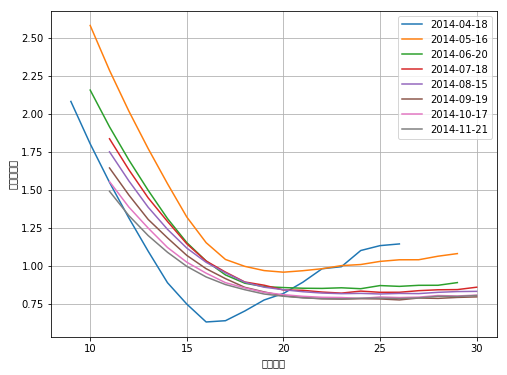

In [19]:
import matplotlib.pyplot as plt
import time
%matplotlib inline
plt.figure(figsize=(8,6))
for maturity in maturities:
    data=plot_data[options_data.MATURITY==maturity]
    local_time=time.localtime(maturity/1000000000)
    maturity=time.strftime("%Y-%m-%d",local_time)
    plt.plot(data['STRIKE'],data['IMP_VOL'],label=maturity,lw=1.5)
plt.grid(True)
plt.xlabel('行权价格')
plt.ylabel('隐含波动率')
plt.legend()
plt.show()

实证研究表明，通过BSM模型计算出来的隐含波动率呈现出一种被称为“波动率微笑”的现象，即具有相同到期日和标的资产而执行价格不同的期权，这些期权的执行价格偏离标的资产现货价格越远，其隐含波动率越大。即价外期权和价内期权（out of money和 in the money）的波动率高于在价期权（at the money）的波动率，使得波动率曲线呈现出中间低两边高的向上的半月形，也就是微笑的嘴形，叫波动率微笑。